In [ ]:
# caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [ ]:
!pip install geopandas contextily   #installo geopandas e contextily

In [2]:
#importo le librerie
import pandas as pd
import geopandas as gdp 
import contextily as ctx 
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
bici = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")  #carico il file

In [ ]:
bici

In [ ]:
# visualizzare il geodataframe

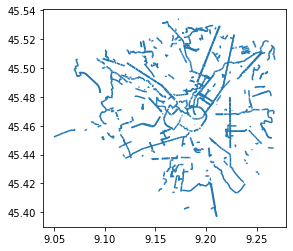

In [ ]:
bici.plot()

In [ ]:
# caricare il geodataframe dei quartieri ds964_nil_wm.zip

In [5]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

In [ ]:
# visualizza la mappa dei quartieri e delle piste ciclabili

In [6]:
#trasformo il crs di entrambi i geodataframe in modo che siano compatibili con quello di contextily (3857)
quartieri_mercatore = quartieri.to_crs(3857)
bici_mercatore = bici.to_crs(3857)

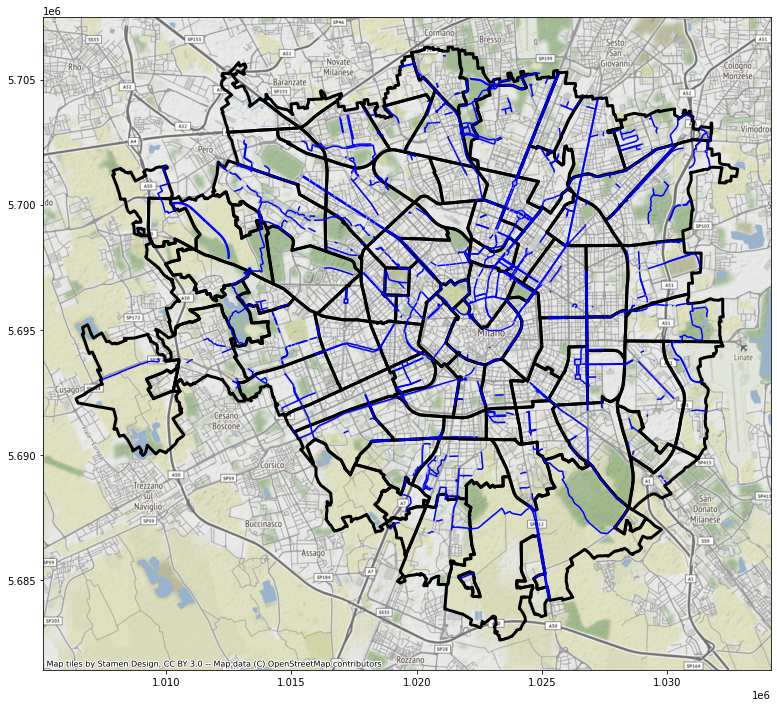

In [ ]:
ax = quartieri_mercatore.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none", linewidth = 3)   #aggiungo al grafico i quartieri
bici_mercatore.plot(ax = ax, edgecolor = "Blue")   #aggiungo le ciclabili al grafico 
ctx.add_basemap(ax)    #aggiungo la mappa di milano

In [ ]:
# creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

In [ ]:
Melchiorre = bici_mercatore[bici_mercatore["anagrafica"].str.contains("MELCHIORRE GIOIA")].geometry.unary_union #unire più linee in un unico oggetto
Melchiorre

In [ ]:
# trovare tutti i quartieri attraversati da questa pista ciclabile

In [ ]:
quartieri_melchiorre = quartieri_mercatore[quartieri_mercatore.intersects(Melchiorre)]
quartieri_melchiorre

ID_NIL                               NIL  Valido_dal Valido_al  \
8       11                             ISOLA  05/02/2020   Vigente   
17      13                   GRECO - SEGNANO  05/02/2020   Vigente   
56      12           MACIACHINI - MAGGIOLINA  05/02/2020   Vigente   
68       9     PORTA GARIBALDI - PORTA NUOVA  05/02/2020   Vigente   
72      10  STAZIONE CENTRALE - PONTE SEVESO  05/02/2020   Vigente   
84       2                             BRERA  05/02/2020   Vigente   

                          Fonte   Shape_Leng    Shape_Area  OBJECTID  \
8   Milano 2030 - PGT Approvato  5082.707418  1.322887e+06        97   
17  Milano 2030 - PGT Approvato  7468.531297  1.768603e+06       106   
56  Milano 2030 - PGT Approvato  6479.190756  1.674918e+06       145   
68  Milano 2030 - PGT Approvato  4451.925002  7.856384e+05       157   
72  Milano 2030 - PGT Approvato  7503.351720  1.556019e+06       161   
84  Milano 2030 - PGT Approvato  5461.667196  1.637333e+06       173   

                                             geometry  
8   POLYGON ((1024268.959 5698936.095, 1024235.017...  
17  POLYGON ((1025497.262 5702124.897, 1025502.138...  
56  POLYGON ((1022457.523 5701463.277, 1022718.771...  
68  POLYGON ((1023996.242 5698175.854, 1023956.540...  
72  POLYGON ((1026182.805 5700535.584, 1026229.157...  
84  POLYGON ((1023209.291 5695669.544, 1023143.444...

In [ ]:
# visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

In [ ]:
MelchiorreSerie = gdp.GeoSeries([Melchiorre])    #trasformo l'oggetto della pista ciclabile unita in una geoseries per usare l'attributo plot()

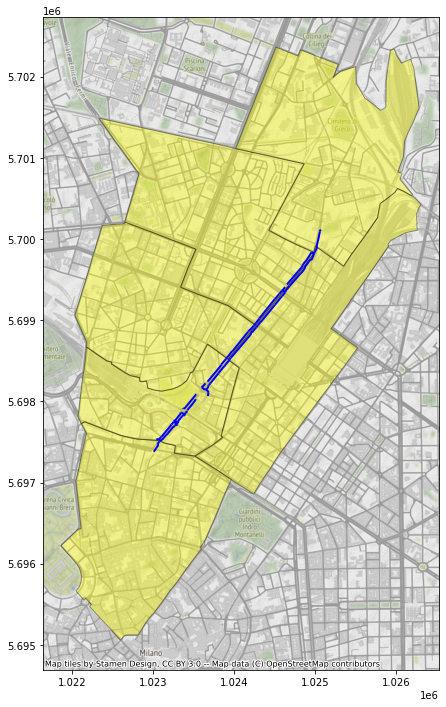

In [ ]:
ax = quartieri_melchiorre.plot(figsize = (15, 12), edgecolor = "k", facecolor = "Yellow", alpha = 0.4)
MelchiorreSerie.plot(ax = ax, edgecolor = "Blue", linewidth = 2)
ctx.add_basemap(ax)

In [ ]:
# caricare il geodataframe delle fontanelle Fontanelle.zip

In [8]:
fontane = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle.zip")

In [ ]:
fontane.crs   #controllo il crs (il sistema di riferimento) del file delle fontane

In [9]:
fontane_mercatore = fontane.to_crs(3857)

In [ ]:
# visualizzare il geodataframe su una mappa

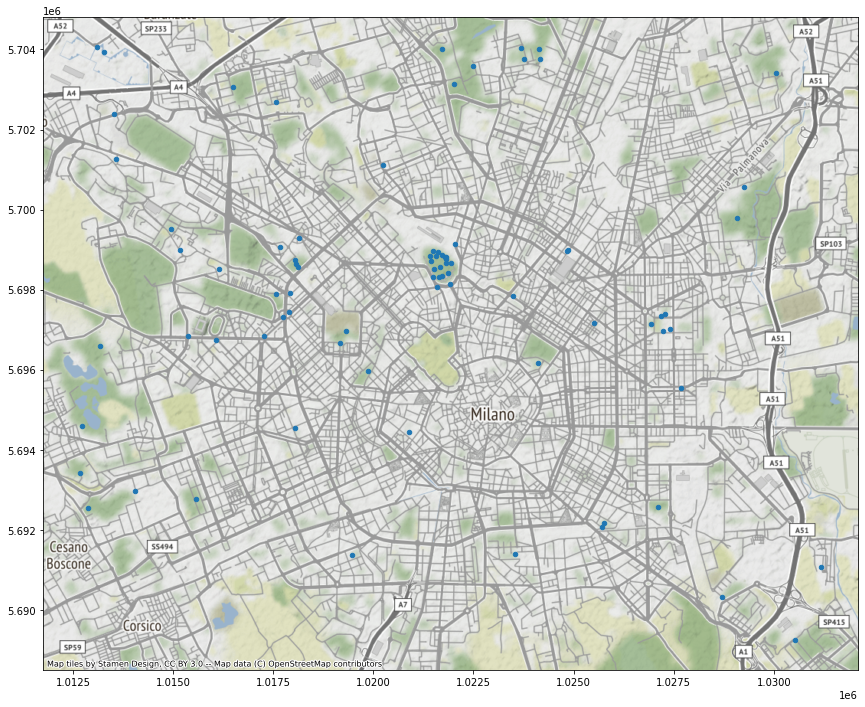

In [ ]:
ax = fontane_mercatore.plot(figsize = (15, 12), markersize = 20)
ctx.add_basemap(ax)

In [ ]:
# visualizzare su una mappa le fontanelle e i quartieri in cui si trovano.
# non visualizzare i quartieri in cui non ci sono fontanelle

In [10]:
fontaneSerie = fontane_mercatore.unary_union   #ho creato un multipunto

In [ ]:
quartieri_fontane = quartieri_mercatore[quartieri_mercatore.intersects(fontaneSerie)]
quartieri_fontane

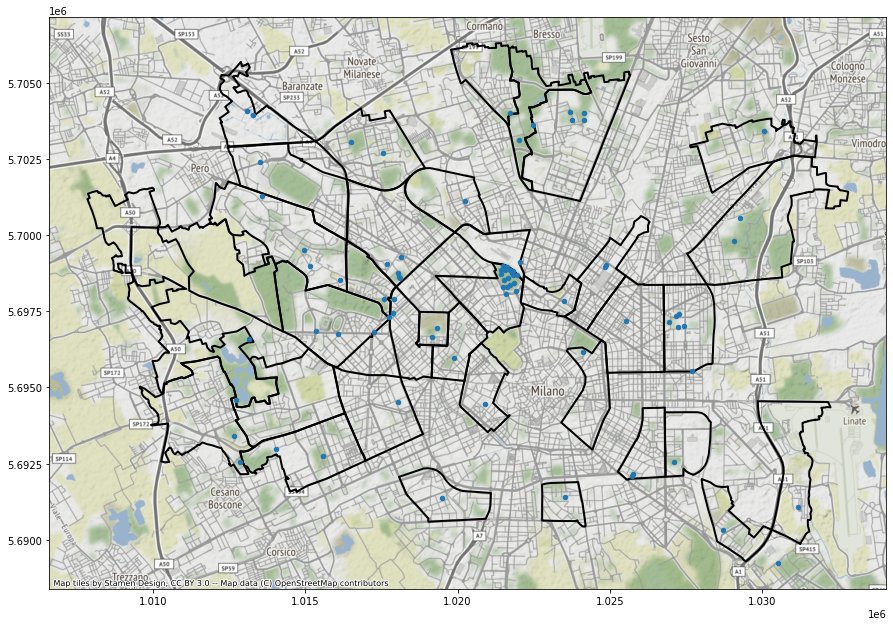

In [ ]:
ax = quartieri_fontane.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none", linewidth = 2)
fontane_mercatore.plot(ax = ax, markersize = 20)
ctx.add_basemap(ax)

In [ ]:
# colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle)
# non evidenziare i quartieri senza fontanelle

In [16]:
#unisco due GeoDataSet aggiungendo ad ogni fontanella le informazioni relative al quartiere
joined = gdp.sjoin(fontane_mercatore, quartieri_mercatore, predicate = "within", how="left")

In [ ]:
joined

Fonte_left  \
0   © OpenStreetMap contributors - OSM   
1   © OpenStreetMap contributors - OSM   
2   © OpenStreetMap contributors - OSM   
3   © OpenStreetMap contributors - OSM   
4   © OpenStreetMap contributors - OSM   
..                                 ...   
77  © OpenStreetMap contributors - OSM   
78  © OpenStreetMap contributors - OSM   
79  © OpenStreetMap contributors - OSM   
80  © OpenStreetMap contributors - OSM   
81  © OpenStreetMap contributors - OSM   

                                              Licenza  \
0   Licenza ODbL - http://www.openstreetmap.org/co...   
1   Licenza ODbL - http://www.openstreetmap.org/co...   
2   Licenza ODbL - http://www.openstreetmap.org/co...   
3   Licenza ODbL - http://www.openstreetmap.org/co...   
4   Licenza ODbL - http://www.openstreetmap.org/co...   
..                                                ...   
77  Licenza ODbL - http://www.openstreetmap.org/co...   
78  Licenza ODbL - http://www.openstreetmap.org/co...   
79  Licenza ODbL - http://www.openstreetmap.org/co...   
80  Licenza ODbL - http://www.openstreetmap.org/co...   
81  Licenza ODbL - http://www.openstreetmap.org/co...   

                                   geometry  index_right  ID_NIL  \
0   POINT Z (1019870.079 5695964.267 0.000)         83.0    68.0   
1   POINT Z (1027683.216 5695551.585 0.000)         76.0    22.0   
2   POINT Z (1017883.472 5697433.856 0.000)         18.0    58.0   
3   POINT Z (1017906.526 5697913.341 0.000)         18.0    58.0   
4   POINT Z (1014950.704 5699503.367 0.000)         47.0    65.0   
..                                      ...          ...     ...   
77  POINT Z (1027415.192 5697010.819 0.000)         76.0    22.0   
78  POINT Z (1027178.360 5697351.996 0.000)         76.0    22.0   
79  POINT Z (1027226.516 5696974.558 0.000)         76.0    22.0   
80  POINT Z (1027273.493 5697396.784 0.000)         76.0    22.0   
81  POINT Z (1019173.954 5696662.034 0.000)         35.0    59.0   

                                                  NIL  Valido_dal Valido_al  \
0                                              PAGANO  05/02/2020   Vigente   
1                                        CITTA' STUDI  05/02/2020   Vigente   
2                              DE ANGELI - MONTE ROSA  05/02/2020   Vigente   
3                              DE ANGELI - MONTE ROSA  05/02/2020   Vigente   
4   Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO  05/02/2020   Vigente   
..                                                ...         ...       ...   
77                                       CITTA' STUDI  05/02/2020   Vigente   
78                                       CITTA' STUDI  05/02/2020   Vigente   
79                                       CITTA' STUDI  05/02/2020   Vigente   
80                                       CITTA' STUDI  05/02/2020   Vigente   
81                                          TRE TORRI  05/02/2020   Vigente   

                    Fonte_right    Shape_Leng    Shape_Area  OBJECTID  
0   Milano 2030 - PGT Approvato   5221.836696  1.289686e+06     172.0  
1   Milano 2030 - PGT Approvato   6007.783217  2.207404e+06     165.0  
2   Milano 2030 - PGT Approvato   5765.950197  1.323029e+06     107.0  
3   Milano 2030 - PGT Approvato   5765.950197  1.323029e+06     107.0  
4   Milano 2030 - PGT Approvato  11053.767762  3.895679e+06     136.0  
..                          ...           ...           ...       ...  
77  Milano 2030 - PGT Approvato   6007.783217  2.207404e+06     165.0  
78  Milano 2030 - PGT Approvato   6007.783217  2.207404e+06     165.0  
79  Milano 2030 - PGT Approvato   6007.783217  2.207404e+06     165.0  
80  Milano 2030 - PGT Approvato   6007.783217  2.207404e+06     165.0  
81  Milano 2030 - PGT Approvato   2995.497099  5.132969e+05     124.0  

[82 rows x 12 columns]

In [17]:
#faccio il groupby del numero di fontanelle per ogni quartiere
fontane_per_quartiere = joined.groupby("NIL")[["Licenza"]].count().reset_index()

In [ ]:
fontane_per_quartiere

NIL  Licenza
0                                             ADRIANO        1
1            BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA        2
2                                          BANDE NERE        1
3                                              BOVISA        1
4                                            BRUZZANO        1
5       BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE        1
6                                     CASCINA MERLATA        2
7                     CIMIANO - ROTTOLE - Q.RE FELTRE        2
8                                        CITTA' STUDI        6
9                              DE ANGELI - MONTE ROSA        2
10                                             FARINI        1
11                                       FORZE ARMATE        1
12                                          GUASTALLA        1
13                                        LORENTEGGIO        2
14                               MAGENTA - S. VITTORE        1
15                       MAGGIORE - MUSOCCO - CERTOSA        1
16                          MONCUCCO - SAN CRISTOFORO        1
17                             MONLUE' - PONTE LAMBRO        1
18                                          MORIVIONE        1
19  NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...        4
20                                        ORTOMERCATO        1
21                                             PAGANO        1
22                              PARCO BOSCO IN CITTA'        1
23                                         PARCO NORD        2
24                      PORTA GARIBALDI - PORTA NUOVA        1
25  Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO        4
26                                               QT 8        2
27                  QUARTO OGGIARO - VIALBA - MUSOCCO        2
28                            ROGOREDO - SANTA GIULIA        1
29                                              SARPI       19
30                                 STADIO - IPPODROMI        3
31                   STAZIONE CENTRALE - PONTE SEVESO        2
32                                          TRE TORRI        2
33                       UMBRIA - MOLISE - CALVAIRATE        2
34                VILLAPIZZONE - CAGNOLA - BOLDINASCO        5

In [18]:
#creo un GeoDataSet aggiungendo ai quartieri il numero di fontane
finale = quartieri_mercatore.merge(fontane_per_quartiere, on="NIL")    #on si riferisce alla colonna in comune ai due dataset (colonna attraverso il quale vengono unificati i due dataframe in modo che siano correttamente allineati)

In [ ]:
finale

ID_NIL                                                NIL  Valido_dal  \
0       84                                         PARCO NORD  05/02/2020   
1       76                  QUARTO OGGIARO - VIALBA - MUSOCCO  05/02/2020   
2       60                                 STADIO - IPPODROMI  05/02/2020   
3        4                                          GUASTALLA  05/02/2020   
4       58                             DE ANGELI - MONTE ROSA  05/02/2020   
5       78                                             FARINI  05/02/2020   
6       83                                           BRUZZANO  05/02/2020   
7       66                                               QT 8  05/02/2020   
8       71                VILLAPIZZONE - CAGNOLA - BOLDINASCO  05/02/2020   
9       88                              PARCO BOSCO IN CITTA'  05/02/2020   
10      14  NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...  05/02/2020   
11      59                                          TRE TORRI  05/02/2020   
12      37                                          MORIVIONE  05/02/2020   
13      29                                        ORTOMERCATO  05/02/2020   
14      28                       UMBRIA - MOLISE - CALVAIRATE  05/02/2020   
15      65  Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO  05/02/2020   
16      31                             MONLUE' - PONTE LAMBRO  05/02/2020   
17      56                                       FORZE ARMATE  05/02/2020   
18      52                                         BANDE NERE  05/02/2020   
19      18                    CIMIANO - ROTTOLE - Q.RE FELTRE  05/02/2020   
20      55           BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA  05/02/2020   
21       9                      PORTA GARIBALDI - PORTA NUOVA  05/02/2020   
22      21      BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE  05/02/2020   
23      45                          MONCUCCO - SAN CRISTOFORO  05/02/2020   
24      10                   STAZIONE CENTRALE - PONTE SEVESO  05/02/2020   
25      77                                             BOVISA  05/02/2020   
26      72                       MAGGIORE - MUSOCCO - CERTOSA  05/02/2020   
27      22                                       CITTA' STUDI  05/02/2020   
28       7                               MAGENTA - S. VITTORE  05/02/2020   
29      73                                    CASCINA MERLATA  05/02/2020   
30      69                                              SARPI  05/02/2020   
31      68                                             PAGANO  05/02/2020   
32      33                            ROGOREDO - SANTA GIULIA  05/02/2020   
33      17                                            ADRIANO  05/02/2020   
34      53                                        LORENTEGGIO  05/02/2020   

   Valido_al                        Fonte    Shape_Leng    Shape_Area  \
0    Vigente  Milano 2030 - PGT Approvato  11741.717005  1.532331e+06   
1    Vigente  Milano 2030 - PGT Approvato   7138.355680  2.776872e+06   
2    Vigente  Milano 2030 - PGT Approvato   8277.734101  3.435178e+06   
3    Vigente  Milano 2030 - PGT Approvato   6559.532771  1.547962e+06   
4    Vigente  Milano 2030 - PGT Approvato   5765.950197  1.323029e+06   
5    Vigente  Milano 2030 - PGT Approvato   5085.569363  1.010193e+06   
6    Vigente  Milano 2030 - PGT Approvato   6441.288643  1.670440e+06   
7    Vigente  Milano 2030 - PGT Approvato   4892.534837  1.024399e+06   
8    Vigente  Milano 2030 - PGT Approvato   8375.003494  3.426941e+06   
9    Vigente  Milano 2030 - PGT Approvato  37072.981211  7.834006e+06   
10   Vigente  Milano 2030 - PGT Approvato  10628.640923  4.246805e+06   
11   Vigente  Milano 2030 - PGT Approvato   2995.497099  5.132969e+05   
12   Vigente  Milano 2030 - PGT Approvato   3772.620413  8.179458e+05   
13   Vigente  Milano 2030 - PGT Approvato   4854.245817  1.402467e+06   
14   Vigente  Milano 2030 - PGT Approvato   4912.251168  1.192352e+06   
15   Vigente  Milano 2030 - PGT Approvato  11053.767762  3.8956

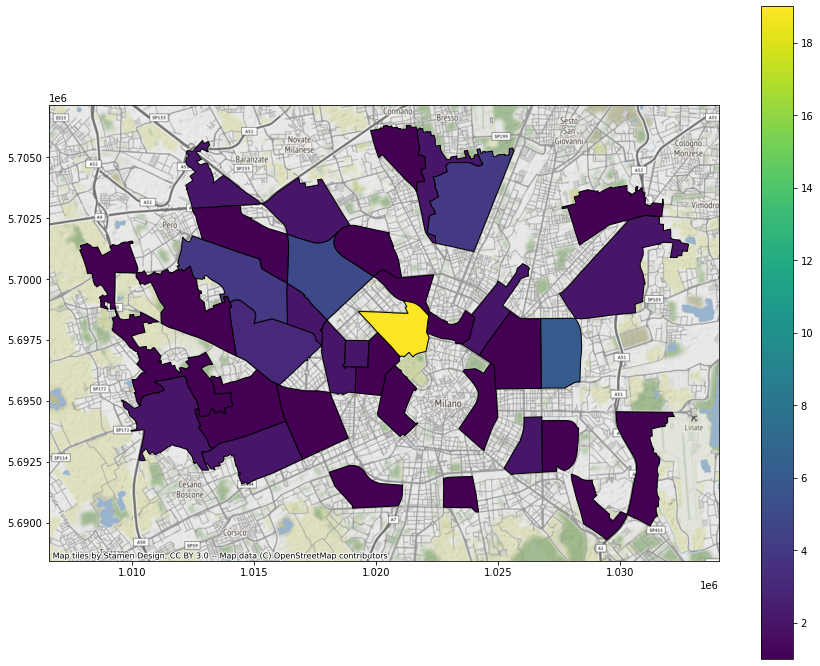

In [19]:
ax = finale.plot(figsize = (15, 12), edgecolor = "k", legend = True, column = "Licenza")
ctx.add_basemap(ax)

In [ ]:
# visalizzare la mappa precedente facendo in modo che i quartieri con fontanelle siano colorati con gradazioni di rosso
# e quelli senza fontanelle con gradazioni di grigio

In [ ]:
quartieri_no_fontane = quartieri_mercatore[quartieri_mercatore.intersects(fontaneSerie) == False]
quartieri_no_fontane

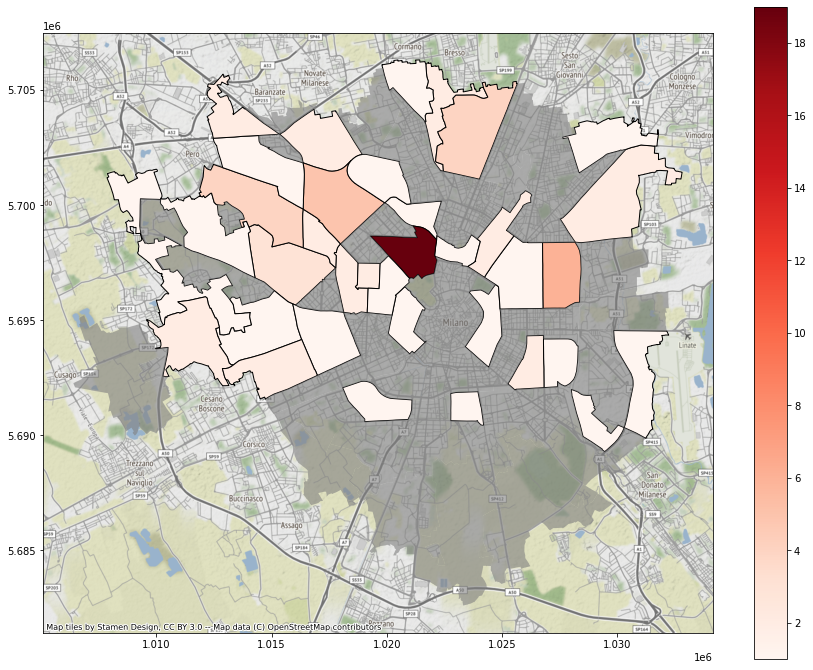

In [22]:
ax = finale.plot(figsize = (15, 12), edgecolor = "k", legend = True, column = "Licenza", cmap = "Reds")
quartieri_no_fontane.plot(facecolor="gray",ax=ax, alpha = 0.6)
ctx.add_basemap(ax)